# LIBRERIAS


In [6]:
import random as rd
from operator import itemgetter
from random import randint, random


# CLASE CURSO

In [7]:
class ClaseCurso:
    def __init__(self,codAsignatura,nombre,docente,horario):
        self.codAsignatura=codAsignatura
        self.nombre=nombre
        self.docente=docente
        self.horario=horario
    def mostrar(self):
        print(f'{self.codAsignatura} {self.nombre} {self.docente} {self.horario}')

#CLASE DIA


In [8]:
class ClaseDia:
    def __init__(self,dia,horaI,horaF,tipo="T"):
        self.dia=dia
        self.horaI=horaI
        self.horaF=horaF
        self.tipo=tipo   #teo = teorico, lab=laboratorio

# CLASE GENETICO

In [9]:
class claseGenetico():
    def __init__(self,_cursos,_aulas,_n,_listaCursos:list,_cantLaboratorios):
        self.probaMutacion=0.80
        self.probaCruce=0.5
        self.poblacion=None
        self.individuo=None
        self.evaluar=None
        self.fo=None
        self.puntuacion=[]
        self.cursos=_cursos
        self.aulas=_aulas
        self.n=_n
        self.listaCursos=_listaCursos
        self.laboratorios=None
        self.cantidadLaboratorios=_cantLaboratorios

    #Generamos un individuo
    def generarIndividuo(self):
        individuo=[[rd.randint(0,1) for k in range(self.cursos)] for j in range(self.aulas)]
        return individuo
    
    #Generamos la poblacion de individuos
    def generarPoblacion(self):
        self.poblacion=[self.generarIndividuo() for i in range(self.n)]
    #[ [[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]],
    #  [[0, 1, 1, 1, 0, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 1, 1, 0, 1, 1, 1, 1, 0, 0]] ]

    #Esta funcion nos sirve para seleecionar a aquellos que son
    #mas aptos.
    def NuevaRuleta(self,pais): #SELECCION DE RULETA
        def sortear(fitness_total, indice_a_ignorar=-1):
            ruleta, acumulado, valor_sorteado = [], 0, random()

            if indice_a_ignorar!=-1:
                fitness_total -= valores[0][indice_a_ignorar]

            for indice, i in enumerate(valores[0]):
                if indice_a_ignorar==indice: 
                    continue
                acumulado += i
                ruleta.append(acumulado/fitness_total)
                if ruleta[-1] >= valor_sorteado:
                    return indice

        valores = list(zip(*pais)) 
        
        fitness_total = sum(valores[0])

        #Recuperamos el indice de la molecula mas apto
        indice_padre = sortear(fitness_total) 

        #Recuperamos el indice de la segunda molecula mas apto
        indice_madre = sortear(fitness_total, indice_padre)

        #Recuperamos el valor con el indice
        padre = valores[1][indice_padre]
        madre = valores[1][indice_madre]
        
        return padre, madre
    
    #[ AULAS , AULAS , AULAS , AULAS , AULAS ]
    #[ [0,1,0,1,0,1] ] , [0,1,0,1,0,1] , [0,1,0,1,0,1] ]
    #[[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]]
    def determinarHorariosLaboratorios(self,curso):
        aula=[]
        dias={"LUNES":0,"MARTES":1,"MIÉRCOLES":2,"JUEVES":3,"VIERNES":4,"SÁBADO":5,"SABADO ":5}
        lab=[]
        for curso in curso.horario:
            for num in range(curso.horaI,curso.horaF):
                if(curso.tipo=="P"):
                    lab.append((dias[curso.dia],num))
                else:
                    aula.append((dias[curso.dia],num))
        return lab,aula

    def generarAuxDocentes(self):
        diccionario={}
        for valor in self.listaCursos:
            diccionario[valor.docente]=-1
        return diccionario

    def determinarSiEntraCurso(self,cromosoma):
        aulasDisponibles=[]
        labosDisponibles=[]
        for aula in cromosoma:
            aulaExtra=[]
            labExtra=[]
            for indice in range(len(aula)):
                if(aula[indice]==0):
                    continue
                else:
                    laboratorioBinario,aulasBinario=self.determinarHorariosLaboratorios(self.listaCursos[indice])
                    labExtra+=laboratorioBinario
                    aulaExtra+=aulasBinario
            aulasDisponibles.append(aulaExtra)
            labosDisponibles.append(labExtra)
        return aulasDisponibles,labosDisponibles
    def cantidadRepetidos(self,lista):
        return dict(zip(lista,map(lambda x: lista.count(x),lista)))

    # Encontrar los cursos que se cruzan horas en un mismo aula y laboratorio
    def ECT(self,cromosoma):
        def contarCastigos(aulasDisponibles):
            if(len(aulasDisponibles) in [0,1]):
                return 0
            castigo=0
            for valor in aulasDisponibles:
                diccionario=self.cantidadRepetidos(valor)
            for key in diccionario:
                if(diccionario[key]>1):
                    castigo+=1
            return castigo
        castigoTotal=0
        aulasDisponibles,labosDisponibles=self.determinarSiEntraCurso(cromosoma)
        castigoTotal+=contarCastigos(aulasDisponibles)
        #[[(0, 16), (0, 17)], [(1, 7), (1, 8), (4, 7), (0, 9), (0, 10), (4, 8), (0, 16), (0, 17)], [(0, 16), (0, 17)]]
        totalLabos=[]
        for valor in labosDisponibles:
            totalLabos+=valor
        reparticionDeLabos=[totalLabos[i:i + self.cantidadLaboratorios] for i in range(0, len(totalLabos), self.cantidadLaboratorios)]
        for valor in reparticionDeLabos:
            castigoTotal+=contarCastigos(valor)
        return castigoTotal

    # Calcular los cursos que se repiten en otras aulas
    def ECDAT(self,cromosoma):
        castigo=0
        primero=cromosoma[0]
        for x in range(len(cromosoma)):
            for y in range(len(cromosoma[x])):
                if(cromosoma[x][y]==1):
                    for z in range(len(cromosoma)):
                        if(cromosoma[z][y]==1 and z!=x):
                            castigo+=1
        return castigo//2


    #[[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]]
    #Paul

    def funcionObjetivo(self,cromosoma):
        #[[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]]
        #return 1/(1+randint(1,5)+randint(1,5))
        return 1/(1+self.ECT(cromosoma)+2*self.ECDAT(cromosoma))
    def evaluacion(self):
        self.evaluar=[(self.funcionObjetivo(valor),valor) for valor in self.poblacion if(self.funcionObjetivo(valor)<=1)]
                    #   (  FuncionObjetivo(valor),valor)
                    #   (            121         , [[1, 0, 1], [0, 1, 1]])
                    #   (            88          , [[1, 0, 1], [0, 1, 1]])
        
        #Ordenar
        sorted(self.evaluar , key=itemgetter(0))

        puntuacion=0
        # ----------- ALMACENANDO LA PUNTUACION DE CADA GENERACION -----------
        for valor in self.evaluar:
            puntuacion+=valor[0]
        self.puntuacion.append(puntuacion/len(self.evaluar))

        # --------------------- CRUCE -----------------------
        hijos=[]
        # Itearamos cada hijo
        while(len(hijos)<self.n):
            #Almacenamos las moleculas mas aptas en padre y madre
            padre,madre=self.NuevaRuleta(self.evaluar)

            #Generamos un numero entre 0 y 1 con "radom()" y si es menor a la
            #probabilidad de cruce -> Cruzamos padre y madre
            if(self.probaCruce>random()):
                for i in range(len(padre)):
                    for j in range(self.cursos//2):
                        madre[i][j]=padre[i][j]
            hijos.append(madre)

        #------------------ MUTACION ---------------------
        for individuo in hijos:
            #Hacemos lo mismo de cruce, generamos un random y lo comparamos con
            #la probabilidad de MUTACION
            if(self.probaMutacion>random()):
                indice_aleatorio=randint(0, len(individuo)-1)
                indice_aleatorioBinario=randint(0, len(individuo[indice_aleatorio])-1)
                #aQUI CAMBIAMOS LOS BIT Si es 0 a 1   y   de 1 a 0
                if individuo[indice_aleatorio][indice_aleatorioBinario] == 1:
                    individuo[indice_aleatorio][indice_aleatorioBinario] = 0
                else:
                    individuo[indice_aleatorio][indice_aleatorioBinario] = 1
        self.poblacion=hijos
        None==madre==padre==hijos
    def info(self):
        print("")
        print("------------ INFO ------------")
        print(f'Tam de cursos: {self.cursos}')
        print(f'Tam de aulas : {self.aulas}')
        print(f'Tam de pobl  : {self.n}')
        print(f'Puntuacion   : {self.puntuacion}')
        print("-----------------------------")
        
    def entrenar(self):
            self.evaluacion()
    def obtenerPoblacion(self):
        return self.poblacion
    def obtenerPuntuacion(self):
        return self.puntuacion


#CLASE GENETICO HIBRIDO GREEDY

In [16]:
class claseGeneticoHibridoGreedy():
    def __init__(self,_cursos,_aulas,_n,_listaCursos:list,_cantLaboratorios):
        self.probaMutacion=0.80
        self.probaCruce=0.5
        self.poblacion=None
        self.individuo=None
        self.evaluar=None
        self.fo=None
        self.puntuacion=[]
        self.cursos=_cursos
        self.aulas=_aulas
        self.n=_n
        self.listaCursos=_listaCursos
        self.laboratorios=None
        self.cantidadLaboratorios=_cantLaboratorios

    #Generamos un individuo
    def generarIndividuo(self):
        individuo=[[rd.randint(0,1) for k in range(self.cursos)] for j in range(self.aulas)]
        return individuo
    
    #Generamos la poblacion de individuos
    def generarPoblacion(self):
        self.poblacion=[self.generarIndividuo() for i in range(self.n)]
    #[ [[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]],
    #  [[0, 1, 1, 1, 0, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 1, 1, 0, 1, 1, 1, 1, 0, 0]] ]
    
    #[ AULAS , AULAS , AULAS , AULAS , AULAS ]
    #[ [0,1,0,1,0,1] ] , [0,1,0,1,0,1] , [0,1,0,1,0,1] ]
    #[[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]]
    def determinarHorariosLaboratorios(self,curso):
        aula=[]
        dias={"LUNES":0,"MARTES":1,"MIÉRCOLES":2,"JUEVES":3,"VIERNES":4,"SÁBADO":5,"SABADO ":5}
        lab=[]
        for curso in curso.horario:
            for num in range(curso.horaI,curso.horaF):
                if(curso.tipo=="lab"):
                    lab.append((dias[curso.dia],num))
                else:
                    aula.append((dias[curso.dia],num))
        return lab,aula

    def generarAuxDocentes(self):
        diccionario={}
        for valor in self.listaCursos:
            diccionario[valor.docente]=-1
        return diccionario

    def determinarSiEntraCurso(self,cromosoma):
        aulasDisponibles=[]
        labosDisponibles=[]
        for aula in cromosoma:
            aulaExtra=[]
            labExtra=[]
            for indice in range(len(aula)):
                if(aula[indice]==0):
                    continue
                else:
                    laboratorioBinario,aulasBinario=self.determinarHorariosLaboratorios(self.listaCursos[indice])
                    labExtra+=laboratorioBinario
                    aulaExtra+=aulasBinario
            aulasDisponibles.append(aulaExtra)
            labosDisponibles.append(labExtra)
        return aulasDisponibles,labosDisponibles
    def cantidadRepetidos(self,lista):
        return dict(zip(lista,map(lambda x: lista.count(x),lista)))

    # Encontrar los cursos que se cruzan horas en un mismo aula y laboratorio
    def ECT(self,cromosoma):
        def contarCastigos(aulasDisponibles):
            if(len(aulasDisponibles) in [0,1]):
                return 0
            castigo=0
            for valor in aulasDisponibles:
                diccionario=self.cantidadRepetidos(valor)
            for key in diccionario:
                if(diccionario[key]>1):
                    castigo+=1
            return castigo
        castigoTotal=0
        aulasDisponibles,labosDisponibles=self.determinarSiEntraCurso(cromosoma)
        castigoTotal+=contarCastigos(aulasDisponibles)
        #[[(0, 16), (0, 17)], [(1, 7), (1, 8), (4, 7), (0, 9), (0, 10), (4, 8), (0, 16), (0, 17)], [(0, 16), (0, 17)]]
        totalLabos=[]
        for valor in labosDisponibles:
            totalLabos+=valor
        reparticionDeLabos=[totalLabos[i:i + self.cantidadLaboratorios] for i in range(0, len(totalLabos), self.cantidadLaboratorios)]
        for valor in reparticionDeLabos:
            castigoTotal+=contarCastigos(valor)
        return castigoTotal

    # Calcular los cursos que se repiten en otras aulas
    def ECDAT(self,cromosoma):
        castigo=0
        primero=cromosoma[0]
        for x in range(len(cromosoma)):
            for y in range(len(cromosoma[x])):
                if(cromosoma[x][y]==1):
                    for z in range(len(cromosoma)):
                        if(cromosoma[z][y]==1 and z!=x):
                            castigo+=1
        return castigo//2


    #[[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]]
    #Paul

    def funcionObjetivo(self,cromosoma):
        #[[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]]
        #return 1/(1+randint(1,5)+randint(1,5))
        return 1/(1+self.ECT(cromosoma)+2*self.ECDAT(cromosoma))


    # USAR EL ALGORITMO GREEDY PARA SELEECIONAR LA SOLUCION OPTIMA
    def AlgoritmoGreddy(self,pais): #SELECCION DE RULETA
        valores = list(zip(*pais))
        #[(0.09090909090909091, 0.2), ([[1, 1, 1, 0, 1], [1, 0, 1, 1, 0], [0, 0, 1, 0, 1]], [[1, 1, 0, 0, 0], [1, 0, 0, 0, 1], [0, 0, 0, 0, 1]])]
        mejorValor2=-999
        mejorPos2=0
        mejorValor = -999
        mejorPos=0
        for indice in range(len(valores[0])):
            if(mejorValor<valores[0][indice]):
                if(valores[0][indice])==1.0:
                    mejorValor=valores[0][indice]
                    mejorPos=indice
                    break
                mejorValor=valores[0][indice]
                mejorPos=indice
        for indice in range(len(valores[0])):
            if(mejorValor2<valores[0][indice] and indice!=mejorPos):
                if(valores[0][indice])==1.0:
                    mejorValor2=valores[0][indice]
                    mejorPos2=indice
                    break
                mejorValor2=valores[0][indice]
                mejorPos2=indice


        #Recuperamos el indice de la molecula mas apto
        indice_padre = mejorPos

        #Recuperamos el indice de la segunda molecula mas apto
        indice_madre = mejorPos2

        #Recuperamos el valor con el indice
        padre = valores[1][indice_padre]
        madre = valores[1][indice_madre]
        
        return padre, madre
    def evaluacion(self):
        self.evaluar=[(self.funcionObjetivo(valor),valor) for valor in self.poblacion if(self.funcionObjetivo(valor)<=1)]
                    #   (  FuncionObjetivo(valor),valor)
                    #   (            121         , [[1, 0, 1], [0, 1, 1]])
                    #   (            88          , [[1, 0, 1], [0, 1, 1]])
        
        #Ordenar
        sorted(self.evaluar , key=itemgetter(0))

        puntuacion=0
        # ----------- ALMACENANDO LA PUNTUACION DE CADA GENERACION -----------
        for valor in self.evaluar:
            puntuacion+=valor[0]
        self.puntuacion.append(puntuacion/len(self.evaluar))

        # --------------------- CRUCE -----------------------
        hijos=[]
        # Itearamos cada hijo
        while(len(hijos)<self.n):
            #Almacenamos las moleculas mas aptas en padre y madre
            padre,madre=self.AlgoritmoGreddy(self.evaluar)

            #Generamos un numero entre 0 y 1 con "radom()" y si es menor a la
            #probabilidad de cruce -> Cruzamos padre y madre
            if(self.probaCruce>random()):
                for i in range(len(padre)):
                    for j in range(self.cursos//2):
                        madre[i][j]=padre[i][j]
            hijos.append(madre)

        #------------------ MUTACION ---------------------
        for individuo in hijos:
            #Hacemos lo mismo de cruce, generamos un random y lo comparamos con
            #la probabilidad de MUTACION
            if(self.probaMutacion>random()):
                indice_aleatorio=randint(0, len(individuo)-1)
                indice_aleatorioBinario=randint(0, len(individuo[indice_aleatorio])-1)
                #aQUI CAMBIAMOS LOS BIT Si es 0 a 1   y   de 1 a 0
                if individuo[indice_aleatorio][indice_aleatorioBinario] == 1:
                    individuo[indice_aleatorio][indice_aleatorioBinario] = 0
                else:
                    individuo[indice_aleatorio][indice_aleatorioBinario] = 1
        self.poblacion=hijos
        None==madre==padre==hijos
    def info(self):
        print("")
        print("------------ INFO ------------")
        print(f'Tam de cursos: {self.cursos}')
        print(f'Tam de aulas : {self.aulas}')
        print(f'Tam de pobl  : {self.n}')
        print(f'Puntuacion   : {self.puntuacion}')
        print("-----------------------------")
        
    def entrenar(self):
            self.evaluacion()
    def obtenerPoblacion(self):
        return self.poblacion
    def obtenerPuntuacion(self):
        return self.puntuacion


# INPUT

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing


def ordenar_lista_curso(lista):
  lista_dias1=['LUNES','MARTES','MIÉRCOLES','JUEVES','VIERNES','SÁBADO','SABADO ']
  lista_order=[]
  for dia in lista_dias1:
    for k in range(len(lista)):
      #print(dia)
      if lista[k][0]==dia:
        lista_order.append(lista[k])
  return lista_order

def orden_codigo(dataset):
  #print(dataset)
  unicos=dataset['CODIGO'].unique()
  #print(unicos)
  lista_horario=[]
  for u in unicos: #recorremos los valores unicos encontrados
    lista_unica=[]
    for _ in range(len(dataset)):#recorremos todo el data set
      if u==dataset.iloc[_,1]:#verificamos 
        lista_unica.append([dataset.iloc[_,9],dataset.iloc[_,10],dataset.iloc[_,11],dataset.iloc[_,5]])
    #verificamos la lista unica y ordenamos
    #print(lista_unica)
    lista_unica=ordenar_lista_curso(lista_unica)
    #print(lista_unica)
    lista_horario.append(lista_unica)
  return(lista_horario)


def buscar_codigo_docent(dataset):
  #print(dataset)
  unicos=dataset['CODIGO'].unique()
  #print(unicos)
  lista_do=[]
  for u in unicos: #recorremos los valores unicos encontrados de codigos
    for _ in range(len(dataset)):#recorremos todo el data set
      if u==dataset.iloc[_,1]:#verificamos 
        lista_do.append([u,dataset.iloc[_,3],dataset.iloc[_,15]])
  return(lista_do)


def unir_listas(prof,horario):
  lista_unida=[]
  tam=0
  k=0
  for i in horario:
    print(tam)
    lista_unida=prof[tam]+horario[k]
    tam=tam+len(i)
    k=k+1
    print(lista_unida)

#qr nombre docente y codigo
#w horarios cada uno tiene un elemento
def unir_listas(prof,horario):
  lista_unida=[]
  tam=0
  k=0
  for i in horario:
    lista_unir=prof[tam]+[horario[k]]
    tam=tam+len(i)
    k=k+1
    lista_unida.append(lista_unir)
  return(lista_unida)


def convertir_objetos(lista_unida):
  totalCursos=[]
  for i in lista_unida1:
    horario=[]
    #print(i)
    for k in range(len(i[3])):
      horario.append(ClaseDia(i[3][k][0],i[3][k][1],i[3][k][2],i[3][k][3]))
    totalCursos.append(ClaseCurso(i[0],i[1],i[2],horario))
  return(totalCursos)


#------------------------ INPUT PRINCIPAL --------------------------------
dataset = pd.read_csv("cargaAcademica.csv",sep=';')
len(dataset)
dataset_copy = dataset.loc[dataset['CARRERA'] == 'INGENIERIA INFORMATICA']
dataset_copy=dataset_copy.loc[dataset_copy['DOCENTES']!='CURSO DESACTIVADO']

w=orden_codigo(dataset_copy)
qr=buscar_codigo_docent(dataset_copy)
unir_listas(qr,w)
lista_unida1=unir_listas(qr,w)
totalCursos=convertir_objetos(lista_unida1)

In [ ]:
totalCursos

# PRUEBAS

## Pruebas Algoritmo Genetico

---- Generado correctamente -------


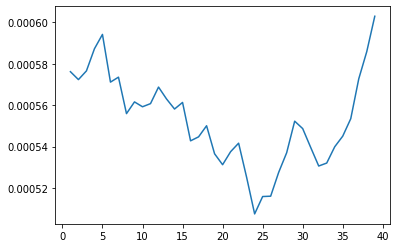

In [19]:
import matplotlib.pyplot as plt

#Inicializamos la clase genetico
var = claseGenetico(_cursos=len(totalCursos),_aulas=10,_n=50,_listaCursos=totalCursos,_cantLaboratorios=2)

#Damos el valor para iterar las generaciones
generaciones = 40

#Generamos la primera poblacion
var.generarPoblacion()
aux=1

#--------------------------------------------------------------
#Empezamos con las iteraciones
while aux<generaciones:
    #Entrenamos nuestra poblacion con cada iteracion
    var.entrenar()
    if(var.puntuacion[-1]==1.0):
        break

    aux+=1

#--------------------------------------------------------------

# Ver datos
y=var.obtenerPuntuacion()
x=[i for i in range(1,len(y)+1)]
print("---- Generado correctamente -------")


plt.plot(x,y)
plt.show()

## Pruebas Algoritmo Genetico Hibrido con Greedy

---- Generado correctamente -------


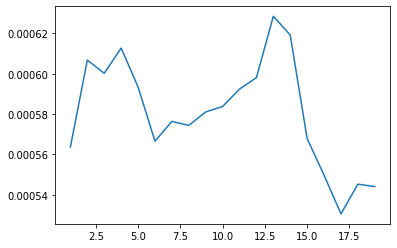

In [20]:
import matplotlib.pyplot as plt

#Inicializamos la clase genetico
var = claseGeneticoHibridoGreedy(_cursos=len(totalCursos),_aulas=10,_n=50,_listaCursos=totalCursos,_cantLaboratorios=2)

#Damos el valor para iterar las generaciones
generaciones = 20

#Generamos la primera poblacion
var.generarPoblacion()
aux=1

#--------------------------------------------------------------
#Empezamos con las iteraciones
while aux<generaciones:
    #Entrenamos nuestra poblacion con cada iteracion
    var.entrenar()
    if(var.puntuacion[-1]==1.0):
        break

    aux+=1

#--------------------------------------------------------------

# Ver datos
y=var.obtenerPuntuacion()
x=[i for i in range(1,len(y)+1)]
print("---- Generado correctamente -------")


plt.plot(x,y)
plt.show()